In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os
import numpy as np
import cv2

In [2]:
dir = 'C:\\Users\\HP\\anaconda3\\Research_Papaya\\Untouch_DataSet_1\\Input_DataSet'

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']
data = []

for category in categories:
    path = os.path.join(dir,category)
    label= categories.index(category) 
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        papaya_img=cv2.imread(imgpath,0)
        try:
            papaya_img=cv2.resize(papaya_img,(50,50))
            image = np.array(papaya_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
        
print(len(data))

54462


In [3]:
import pickle
import random
from sklearn.model_selection import train_test_split


pick_in=open('randomF.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [4]:
pick_in=open('randomF.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [5]:
from sklearn.ensemble import RandomForestClassifier

features = []
labels = []
random.shuffle(data)

for feature, label in data:
    features.append(feature)
    labels.append(label)

    
xtrain, xtest, ytrain, ytest = train_test_split(features,labels, test_size = 0.98)
model = RandomForestClassifier(n_estimators=20)
model.fit(xtrain, ytrain)

pick = open('random.sav','wb')
pickle.dump(model,pick)
pick.close()

Accuracy:   0.4752215539692354
Prediction is  :  powdery_mildew_1


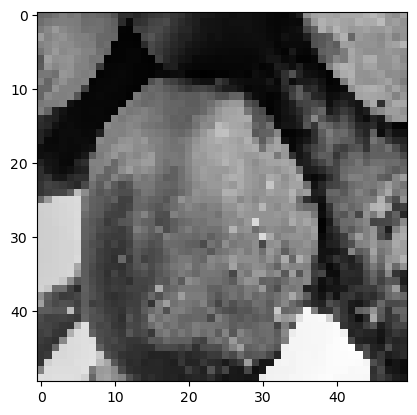

In [6]:
pick = open('random.sav','rb')
model = pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']

print('Accuracy:  ', accuracy)
print('Prediction is  : ',categories[prediction[0]])


mypapaya=xtest[0].reshape(50,50)
plt.imshow(mypapaya,cmap='gray')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
cm

array([[ 2356,  1468,   879,  1422,   408],
       [  820,  4566,  2658,  3712,   366],
       [  610,  2621,  5464,  2193,   342],
       [  717,  2026,  1621, 12148,   286],
       [ 1155,  1016,  1228,  2461,   830]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

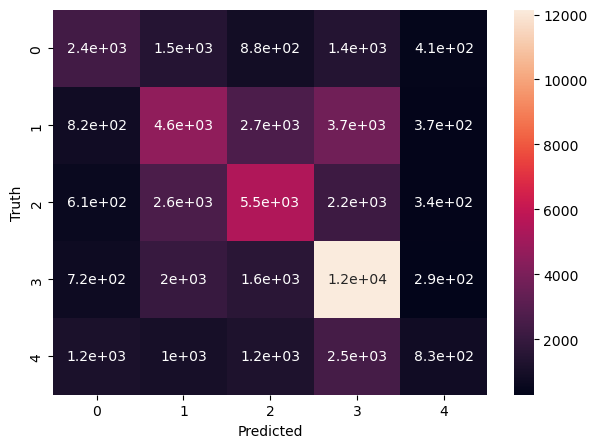

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.36      0.39      6533
           1       0.39      0.38      0.38     12122
           2       0.46      0.49      0.47     11230
           3       0.55      0.72      0.63     16798
           4       0.37      0.12      0.19      6690

    accuracy                           0.48     53373
   macro avg       0.44      0.41      0.41     53373
weighted avg       0.46      0.48      0.45     53373

